# Séries de Taylor - Approximation polynomiale

## Formule de Taylor

La formule de Taylor, notée $t_{n}(x)$, est une approximation polynomiale de la fonction $f$ autour du point $a$.

Par définition, on a $t_n(x) = f(a) + f'(a)(x-a) + \frac{f''(a)}{2!}(x-a)^2 + \cdots + \frac{f^{(n)}(a)}{n!}(x-a)^n$.

On peut la définir de manière récursive comme suit:

- $t_{0}(x) = f(a)$
- $t_{n+1}(x) = t_{n}(x) + \frac{f^{(n+1)}(a)}{(n+1)!}(x-a)^{n+1}$

Ou encore,
- $t_{0}(x) = f(a)$
- $t_{n}(x) = t_{n-1}(x) + \frac{f^{(n)}(a)}{n!}(x-a)^{n}$


On constate:
- $t_0(a) = f(a)$
- $t_1(a) = f(a) + f'(a)(x-a) =$ Approximation linéraire traditionnelle
- $(t_n(a))' = t_{n-1}(a)$ => Dériver la série de Taylor revient à garder la série d'ordre inférieur.

In [68]:
try:
    from matplotlib import pyplot as plt
except:
    !pip install matplotlib
    from matplotlib import pyplot as plt
try:
    import numpy as np
except:
    !pip install numpy
    import numpy as np
try:
    import sympy as sp
    x = sp.Symbol('x')

except:
    !pip install sympy
    import sympy as sp
    x = sp.Symbol('x')
try:
    import warnings
    warnings.filterwarnings('ignore')
except:
    !pip install warnings
    import warnings
    warnings.filterwarnings('ignore')
try:
    from IPython.display import display, Math, Latex
except:
    !pip install IPython
    from IPython.display import display, Math, Latex

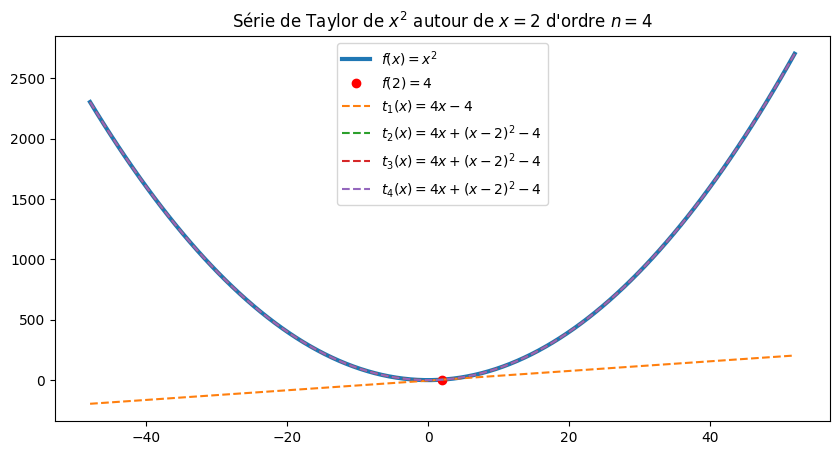

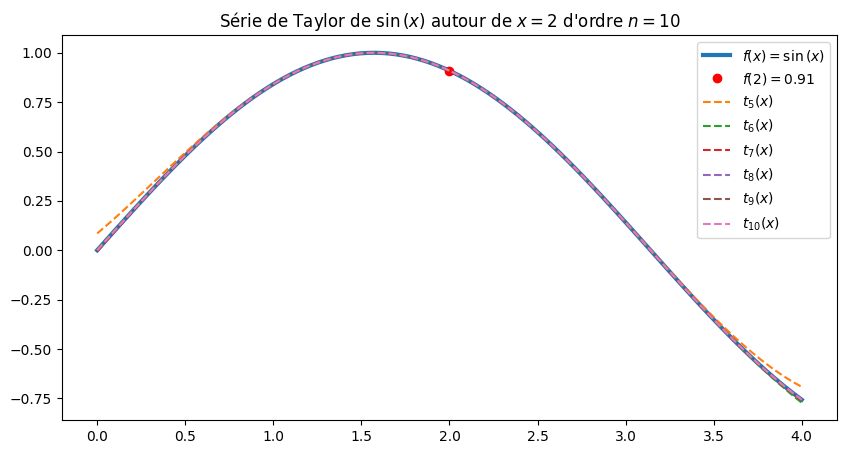

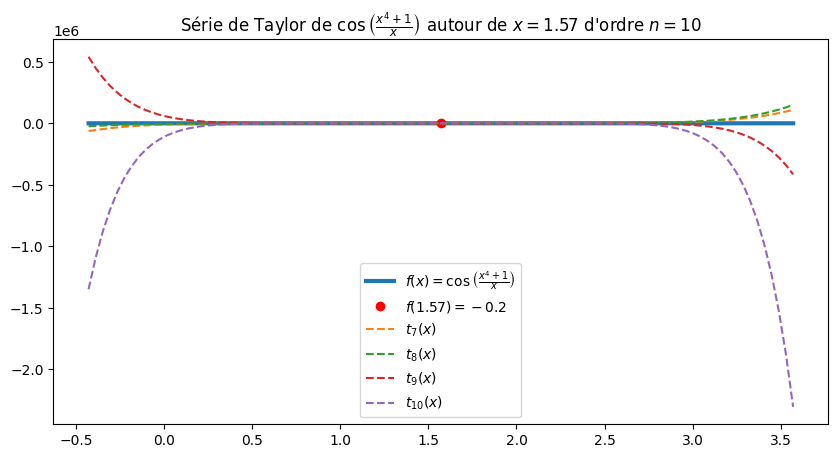

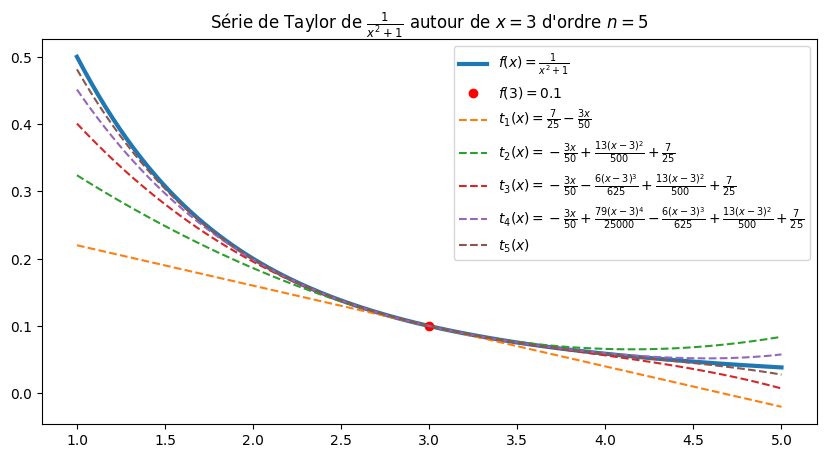

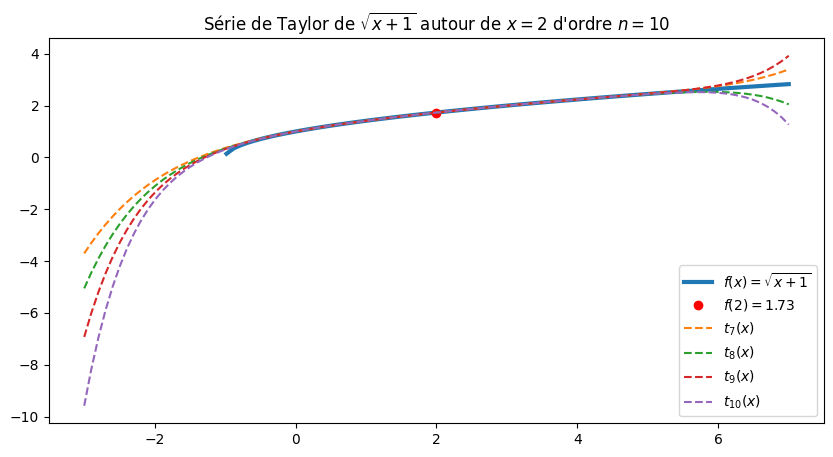

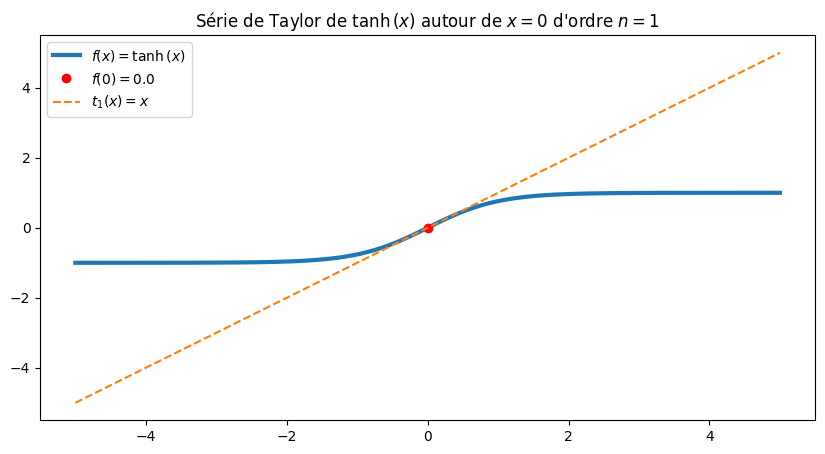

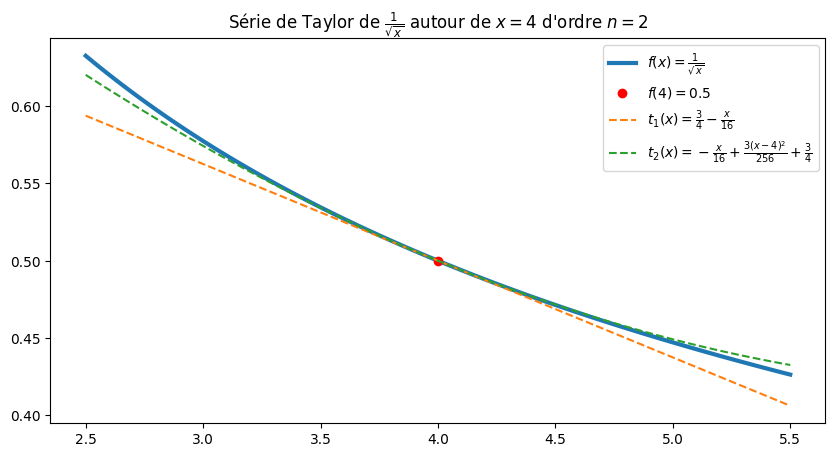

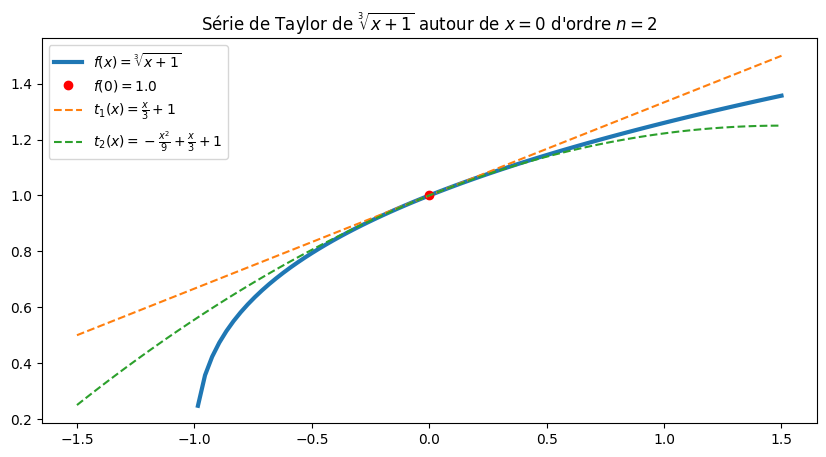

In [74]:
def Taylor(f,n,a):
    # t_n(x) = f(a) + f'(a)(x-a) + f''(a)(x-a)^2/2! + ... + f^(n)(a)(x-a)^n/n!
    t_n = 0
    for i in range(n+1):
        f_n = f.diff(x,i)
        t_n += f_n.subs(x,a)*(x-a)**i/sp.factorial(i)
    return t_n


def PlotTaylor(f, a, n, min = 0, R = 2):
    fig, ax = plt.subplots(figsize=(10, 5))
    x_vals = np.linspace(a - R, a + R, 100)
    f_lambda = sp.lambdify(x, f, 'numpy')
    ax.plot(x_vals, f_lambda(x_vals), label='$f(x) = {}$'.format(sp.latex(f)), linewidth=3)
    ax.plot(a, f_lambda(a), 'ro', label='$f({}) = {}$'.format(round(a,2), round(f_lambda(a), 2)))
    for i in range(min, n+1):
        if i == 0:
            continue
        t_n = Taylor(f,i,a)
        t_n_lambda = sp.lambdify(x, t_n, 'numpy')
        if i <= 4:
            if type(t_n_lambda(x_vals)) == int or type(t_n_lambda(x_vals)) == float:
                y = t_n_lambda(x_vals) * np.ones(len(x_vals))
                ax.plot(x_vals, y, label='$t_{}(x) = {}$'.format(i, sp.latex(t_n)), linestyle='dashed')
            else:
                ax.plot(x_vals, t_n_lambda(x_vals), label='$t_{{{}}}(x) = {}$'.format(i, sp.latex(t_n)), linestyle='dashed')
        else:
            ax.plot(x_vals, t_n_lambda(x_vals), label='$t_{{{}}}(x)$'.format(i), linestyle='dashed')
    plt.title("Série de Taylor de ${}$ autour de $x={}$ d'ordre $n={}$".format(sp.latex(f),round(a,2),n))
    ax.legend()
    plt.show()


# Exemple d'utilisation
# f = x**2
# f = sin(x)
# f = cos(x**4+1/x)
# f = 1/(1+x**2)

a = 2
n = 4
f = x**2
PlotTaylor(f, a, n, R = 50)

a = 2
n = 10
f = sp.sin(x)
PlotTaylor(f, a, n, n-5)

a = np.pi/2
n = 10
f = sp.cos((x**4+1)/x)
PlotTaylor(f, a, n, n-3)

a = 3
n = 5
f = 1/(1+x**2)
PlotTaylor(f, a, n, 0)

a = 2
n = 10
f = sp.sqrt(x+1)
PlotTaylor(f, a, n, n-3, R = 5)

a = 0
n = 1
f = sp.tanh(x)
PlotTaylor(f, a, n, 0, R = 5)

a = 4
n = 2
f = 1/sp.sqrt(x)
PlotTaylor(f, a, n, 0, R = 1.5)

a = 0
n = 2
f = sp.cbrt(1+x)
PlotTaylor(f, a, n, 0, R = 1.5)

## Calcul d'une borne d'erreur

### Utilité

La borne d'erreur permet de déterminer l'ordre de la série de Taylor à utiliser pour avoir une approximation de la fonction $f$ avec une précision donnée.

### En pratique

Si $f$ est continuement dérivable $n+1$ fois sur l'intervalle ouvert comprennant $a$ et $x$, alors le polynôme à l'ordre $n+1$ fournit la valeur exacte de $f(x)$ en fonction de $f(a)$, des $n$ dérivées et de la $n+1$ dérivée évaluée en un point $c$ entre $a$ et $x$.

$f(x) = f(a) + f'(a)(x-a) + \frac{f''(a)}{2!}(x-a)^2 + \cdots + \frac{f^{(n)}(a)}{n!}(x-a)^n + \color{red}{\frac{f^{(n+1)}(c)}{(n+1)!}(x-a)^{n+1}}$

Il existe un réel $c$ entre $a$ et $x$ tel que $f(x) - t_n(x) = \frac{f^{(n+1)}(c)}{(n+1)!}(x-a)^{n+1}$.

---

Si $B_{n+1}$ est le maximum de la différence en valeurs absolues entre $f(x)$ et $t_n(x)$, alors $|f(x) - t_n(x)| \leq \frac{B_{n+1}}{(n+1)!}|x-a|^{n+1} \leq \frac{B_{n+1}}{(n+1)!}(b-a)^{n+1}$ où $B_{n+1}$ est le maximum de la valeur absolue de la dérivée $n+1$ fois.

---
#### Inégalité de Taylor

De la même manière, si $m$ est une borne inférieure et $M$ est une borne supérieure de la dérivée $n+1$-ième de $f$ sur l'intervalle $[a,b]$, ce qu'on peut écrire $m\leq f^{(n+1)}(x) \leq M$,

alors $t_n(x) + \frac{m}{(n+1)!}(x-a)^{n+1} \leq f(x) \leq t_n(x) + \frac{M}{(n+1)!}(x-a)^{n+1}$.

---

#### Oscillation et série de Taylor

Soit $C_n := M_n - m_n$ l'oscillation de la dérivée $n$-ième de $f$ sur l'intervalle $[a,b]$, où $M_n$ est le maximum et $m_n$ est le minimum de la dérivée $n$-ième de $f$ sur l'intervalle $[a,b]$.

On obtient ainsi l'erreur maximale de la série de Taylor à l'ordre $n$:
$|f(x)-t_n(x)| \leq \frac{C_{n}}{n!}|x-a|^{n} \leq \frac{C_{n}}{n!}(b-a)^{n}$ pour tout $x \in [a,b]$.

Cette estimation est particulièrement intéressante lorsque $C_n$ est petit, c'est à dire lorsque la dérivée $n$-ième de $f$ est peu oscillante sur l'intervalle $[a,b]$.

On a alors $\frac{C_n}{b-a} = \frac{M_n - m_n}{b-a} \geq |f^{n+1}|$


---

# Théorème de Taylor

Soit $f$ une fonction infiniement dérivable sur un intervalle ouvert $I$. Soient $a,b$ deux points de $I$ tels que $a<b$.	
On suppose que $lim_{n \to \infty} \frac{C_n}{n!}(b-a)^n = 0$ où $C_n$ est l'oscillation de la dérivée $n$-ième de $f$ sur l'intervalle $[a,b]$.

Alors, pour tout $x \in [a,b]$, la série de Taylor de $f$ en $a$ converge vers $f(x)$.

$f(x) = lim_{n \to \infty} t_n(x) = \sum_{k=0}^{\infty} \frac{f^{(k)}(a)}{k!}(x-a)^k$

De plus, la suite des polyômes de Taylor converge uniformément vers $f$ sur $[a,b]$.

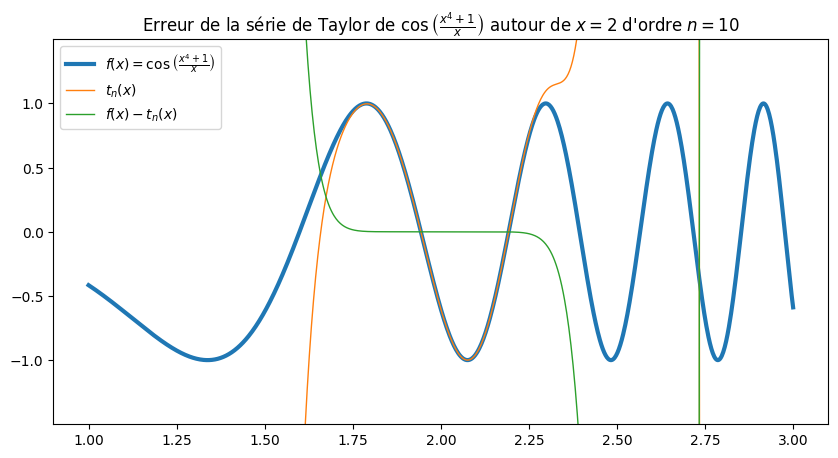

In [70]:
def PlotError(f,t_n,a,n, R = 2):
    fig, ax = plt.subplots(figsize=(10, 5))
    x_vals = np.linspace(a-R, a+R, 1000)
    f_lambda = sp.lambdify(x, f, 'numpy')
    t_n_lambda = sp.lambdify(x, t_n, 'numpy')
    ax.plot(x_vals, f_lambda(x_vals), label='$f(x) = {}$'.format(sp.latex(f)), linewidth=3)
    if n <= 5:
        ax.plot(x_vals, t_n_lambda(x_vals), label='$t_n(x) = {}$'.format(sp.latex(t_n)), linewidth=1)
    else:
        ax.plot(x_vals, t_n_lambda(x_vals), label='$t_n(x)$', linewidth=1)
    ax.plot(x_vals, f_lambda(x_vals)-t_n_lambda(x_vals), label='$f(x)-t_n(x)$', linewidth=1)
    ax.set_ylim([min(f_lambda(x_vals))-0.5, max(f_lambda(x_vals))+0.5])
    plt.title("Erreur de la série de Taylor de ${}$ autour de $x={}$ d'ordre $n={}$".format(sp.latex(f),round(a,2),n))
    ax.legend()
    plt.show()


#f = sp.sin(x)
f = sp.cos((x**4+1)/x)
#f = 1/(1+x**2)
#f = sp.sqrt(x+1)
#f = sp.tanh(x)
#f = 1/sp.sqrt(x)
#f = sp.cbrt(1+x)
a = 2
n = 10
t_n = Taylor(f,n,a)
PlotError(f,t_n,a,n, R = 1)

In [71]:
import time
from IPython.display import display, Math, Latex
f = sp.sin(x)
#f = sp.cos((x**4+1)/x)
#f = 1/(1+x**2)
#f = sp.sqrt(x+1)
#f = sp.tanh(x)
#f = 1/sp.sqrt(x)
#f = sp.cbrt(1+x)
display(Math('f(x) = {}'.format(sp.latex(f))))
for i in range(1,11):
    start = time.time()
    t_n = Taylor(f,i,a)
    end = time.time()
    print("Temps: {}" .format(round(end-start,2)), end = ' ')
    display(Math('\t t_{{{}}}(x) = {}'.format(i,sp.latex(t_n))))

<IPython.core.display.Math object>

Temps: 0.0 

<IPython.core.display.Math object>

Temps: 0.0 

<IPython.core.display.Math object>

Temps: 0.0 

<IPython.core.display.Math object>

Temps: 0.0 

<IPython.core.display.Math object>

Temps: 0.0 

<IPython.core.display.Math object>

Temps: 0.01 

<IPython.core.display.Math object>

Temps: 0.0 

<IPython.core.display.Math object>

Temps: 0.01 

<IPython.core.display.Math object>

Temps: 0.01 

<IPython.core.display.Math object>

Temps: 0.01 

<IPython.core.display.Math object>

Avancement du calcul de la dérivée de f(x) = sin(x)               : 100% [--------------------]

Avancement du calcul de la dérivée de f(x) = cos((x**4 + 1)/x)    : 100% [--------------------]

Avancement du calcul de la dérivée de f(x) = 1/(x**2 + 1)         : 100% [--------------------]

Avancement du calcul de la dérivée de f(x) = sqrt(x + 1)          : 100% [--------------------]

Avancement du calcul de la dérivée de f(x) = tanh(x)              : 100% [--------------------]

Avancement du calcul de la dérivée de f(x) = 1/sqrt(x)            : 100% [--------------------]

Avancement du calcul de la dérivée de f(x) = (x + 1)**(1/3)       : 100% [--------------------]



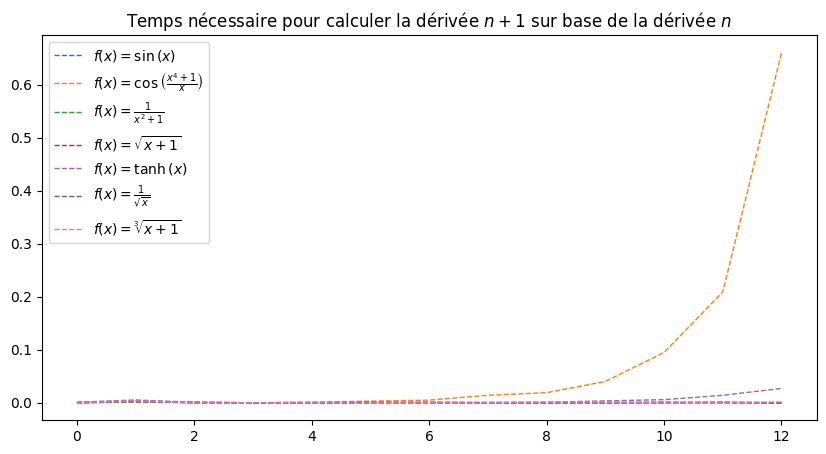

Avancement du calcul de la dérivée de f(x) = sin(x)               : 100% [--------------------]

Avancement du calcul de la dérivée de f(x) = 1/(x**2 + 1)         : 100% [--------------------]

Avancement du calcul de la dérivée de f(x) = sqrt(x + 1)          : 100% [--------------------]

Avancement du calcul de la dérivée de f(x) = tanh(x)              : 100% [--------------------]

Avancement du calcul de la dérivée de f(x) = 1/sqrt(x)            : 100% [--------------------]

Avancement du calcul de la dérivée de f(x) = (x + 1)**(1/3)       : 100% [--------------------]



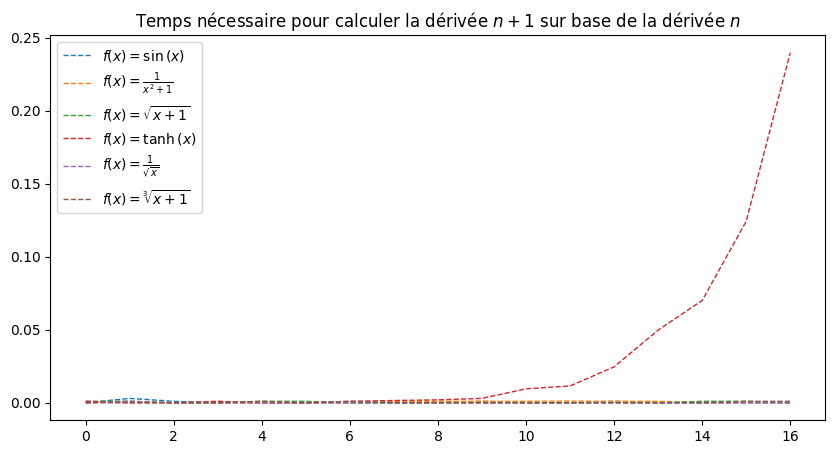

Avancement du calcul de la dérivée de f(x) = sin(x)               : 100% [--------------------]

Avancement du calcul de la dérivée de f(x) = 1/(x**2 + 1)         : 100% [--------------------]

Avancement du calcul de la dérivée de f(x) = sqrt(x + 1)          : 100% [--------------------]

Avancement du calcul de la dérivée de f(x) = 1/sqrt(x)            : 100% [--------------------]

Avancement du calcul de la dérivée de f(x) = (x + 1)**(1/3)       : 100% [--------------------]



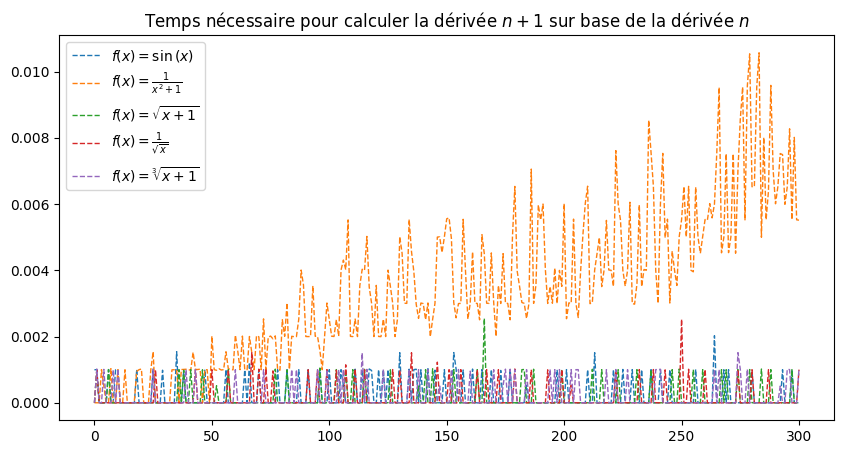

In [72]:
def computeTimeForOneDerivative(f,n,a):
    tempsPourDerivee = []
    start = time.time()
    t_0 = Taylor(f,0,a)
    end = time.time()
    tempsPourDerivee.append(end-start)
    t_n = f
    for i in range(n):
        print("\rAvancement du calcul de la dérivée de f(x) = {} {}: \033[1;32;40m{}%\033[0m [\033[1;32;40m{}\033[0m\033[1;31;40m{}\033[0m]".format(f, ' '*(20-len(str(f))),round((i+1)/(n)*100),int((i+1)/(n)*20)*'-',int((n-i-1)/(n)*20)*' '), end = '')
        start = time.time()
        t_n = t_n.diff(x,1)
        end = time.time()
        tempsPourDerivee.append(end-start)
    print("\n")
    return tempsPourDerivee

def PlotTimeNecessaryForDerivative(f,n,a):
    temps = np.zeros((len(f),n+1))
    fig, ax = plt.subplots(figsize=(10, 5))
    for i in range(len(f)):
        ax.plot(range(n+1), computeTimeForOneDerivative(f[i],n,a), label='$f(x) = {}$'.format(sp.latex(f[i])), linewidth=1, linestyle='dashed')
    plt.title("Temps nécessaire pour calculer la dérivée $n+1$ sur base de la dérivée $n$")
    ax.legend()
    plt.show()

f = [sp.sin(x), sp.cos((x**4+1)/x), 1/(1+x**2), sp.sqrt(x+1), sp.tanh(x), 1/sp.sqrt(x), sp.cbrt(1+x)]
a = 2
n = 12
PlotTimeNecessaryForDerivative(f,n,a)


f = [sp.sin(x), 1/(1+x**2), sp.sqrt(x+1), sp.tanh(x), 1/sp.sqrt(x), sp.cbrt(1+x)]
a = 2
n = 16
PlotTimeNecessaryForDerivative(f,n,a)

f = [sp.sin(x), 1/(1+x**2), sp.sqrt(x+1), 1/sp.sqrt(x), sp.cbrt(1+x)]
a = 2
n = 300
PlotTimeNecessaryForDerivative(f,n,a)